# Load Pre-trained

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
from pymagnitude import *
# local loading
file_path = 'GoogleNews-vectors-negative300.magnitude'
# remote loading
# file_path = 'http://magnitude.plasticity.ai/word2vec/heavy/GoogleNews-vectors-negative300.magnitude'
vectors = Magnitude(file_path)

# Answers

## Q1: Dimensionality

In [3]:
print(vectors.emb_dim)

300


The dimensionality of these word embeddings is $300$.

## Q2: Top-5 most similar word

In [4]:
# Top-5 most similar
vectors.most_similar('picnic')[:10]

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216),
 ('cookout', 0.63243484),
 ('Hiking_biking_camping', 0.6256069),
 ('barbeque', 0.62256277),
 ('barbecue', 0.6195759)]

In [5]:
?vectors.most_similar

The vectors.most_similar() function returns a list of tuples with words and the corresponding similarity towards to a given word. The above returns show that the top-10 most similar words to picnic. Ignoring 'picnic', the top-5 most similar words to picnic are **picnic_lunch, potluck_picnic, picnic_supper, picnicking** and **cookout**.

## Q3: Accoding to the word embeddings, which of these words is not like the others?

    ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

In [6]:
words = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

In [7]:
def get_dist_matrix(words, vectors):
    """
    Args:
    @param words: (list-like) candidate words
    @param vectors: (pymagnitude.Magnitude) word embeddings
    
    Return:
    dist: (np-array) a distance matrix
    """
    n = len(words)
    dist_mat = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist = vectors.distance(words[i], words[j])
            dist_mat[i,j] = dist
            dist_mat[j,i] = dist
    return dist_mat

In [8]:
word_dist_mat = get_dist_matrix(words, vectors)

<AxesSubplot:>

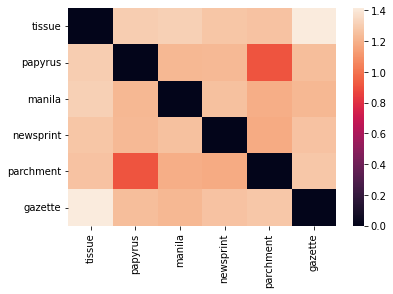

In [9]:
sns.heatmap(
    word_dist_mat,
    xticklabels = words,
    yticklabels = words
)

In [10]:
vectors.doesnt_match(words) 

'tissue'

The heatmap shows the distances between each pair of words. The ligher the color is, the more different the word is. Hence, 'tissue' is the word that is not like others. We also check the answer with the function of vectors.doesnt_match(), which proves our conclusion.

## Q4: Solve the following analogy: leg is to jump as X is to throw

$$jump - leg = throw - X
$$


In [11]:
vectors.most_similar(positive = ['leg', 'throw'], negative = ['jump'])[:1]

[('forearm', 0.48294652)]

Thus, leg is to jump as forearm is to throw